In [31]:
import numpy as np
m = 50 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 10*(x**5)+55*(x**4)+59*(x**3)-4*(x**2) - 3*x + 2 + 50*np.random.randn(m,1)

In [32]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)
print(x[:3])
print(y[:3])

<class 'numpy.ndarray'> 2 (50, 1) <class 'numpy.ndarray'> 2 (50, 1)
[[ 2.60302027]
 [-1.11167493]
 [ 2.79818027]]
[[4688.75265722]
 [ -32.24429268]
 [6295.77773794]]


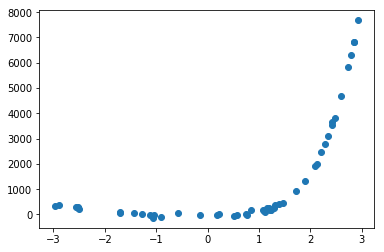

In [33]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(40, 1) (40, 1) (10, 1) (10, 1)


In [35]:
# let's plot a linear regression and a polynomial regression on this, and 
# compare fits on the entire training data


In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[724.90609985] [[767.88170607]]


Mean Squared Error on Test:  3760509.8899782463
[5 2 3 9 4 8 0 6 1 7]
[[-2.97069872]
 [-2.51783475]
 [-1.4274856 ]
 [-1.04538832]
 [ 0.56437783]
 [ 1.21255342]
 [ 2.08693044]
 [ 2.60302027]
 [ 2.73769888]
 [ 2.84573391]]
[[-1556.23910472]
 [-1208.49314235]
 [ -371.23397524]
 [  -77.82846514]
 [ 1158.28150838]
 [ 1656.0036858 ]
 [ 2327.42180637]
 [ 2723.71774887]
 [ 2827.13498817]
 [ 2910.09310984]]


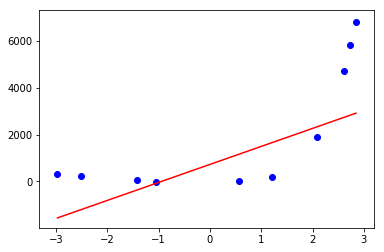

In [37]:
#this block of code plots the predicted values as a red line
#and the actual values as a scatter plot, along with the 
#mean squared error
# re-use this as needed 

y_predict = lin_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
print(order)
xs = x_test[order]
print(xs)
ys = y_predict[order]
print(ys)
plt.plot(xs,ys,"r-")
plt.scatter(x_test, y_test, color='blue')
plt.show()


In [42]:
# let's add polynomial features of degree num_degrees (modify this and play around
# with this block of code and the next. what do you find?

from sklearn.preprocessing import PolynomialFeatures
num_degrees = 7
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[2.60302027] [  2.60302027   6.77571455  17.63732234  45.91030763 119.50546155
 311.07513927 809.7348943 ]
(50, 1) (50, 7)


[-43.43282581] [[56.60328184 21.98271886  9.14160746 52.8523769  19.34288345 -0.08204563
  -0.4991052 ]]
Mean Squared Error on Test:  2482.3612151522198


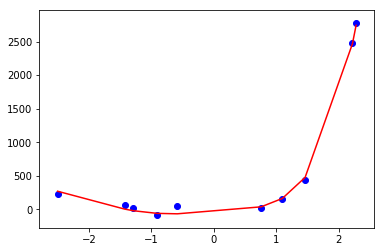

In [43]:

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

In [40]:
# In class work. repeat the above analyses for different polynomials, different
# train-test splits. work in groups of 2 and present in class

Mean Squared Error on Test:  2146.347873792941
[-30.16077485] [-7.95868088e+00  1.48083306e+01  6.67745811e+01  5.31182804e+01
  6.69430340e+00 -1.75203154e-02  3.00845065e-01]


C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


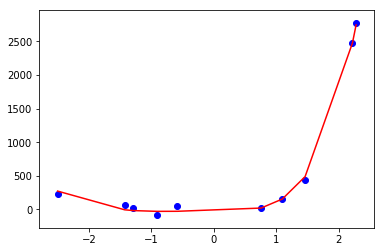

In [44]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

plt.plot(xs,y_predict,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()


In [ ]:
# CLASS WORK. Play around with this code to see if you can construct scenarios here where
# lass regression helps in fitting a better model
